In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
token = ''
QiskitRuntimeService(channel="ibm_quantum", token=token)

<QiskitRuntimeService>

In [9]:
import numpy as np
from numpy import pi
# imoprting Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService
import pandas as pd

In [11]:
backend_aer = AerSimulator()

In [13]:
sampler_aer = SamplerV2(backend=backend_aer)

/var/folders/gx/m6hk7d391d9_1gkrtzc1535w0000gn/T/ipykernel_44749/1936855856.py:1: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler_aer = SamplerV2(backend=backend_aer)


In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q0 = QuantumRegister(4, 'q0')
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q0, qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.s(qreg_q[0])
circuit.cy(qreg_q[0], qreg_q[4])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[2])
circuit.cz(qreg_q[2], qreg_q[0])
circuit.cz(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.h(qreg_q[3])
circuit.s(qreg_q[3])
circuit.cz(qreg_q[3], qreg_q[0])
circuit.cz(qreg_q[3], qreg_q[2])
circuit.cy(qreg_q[3], qreg_q[4])

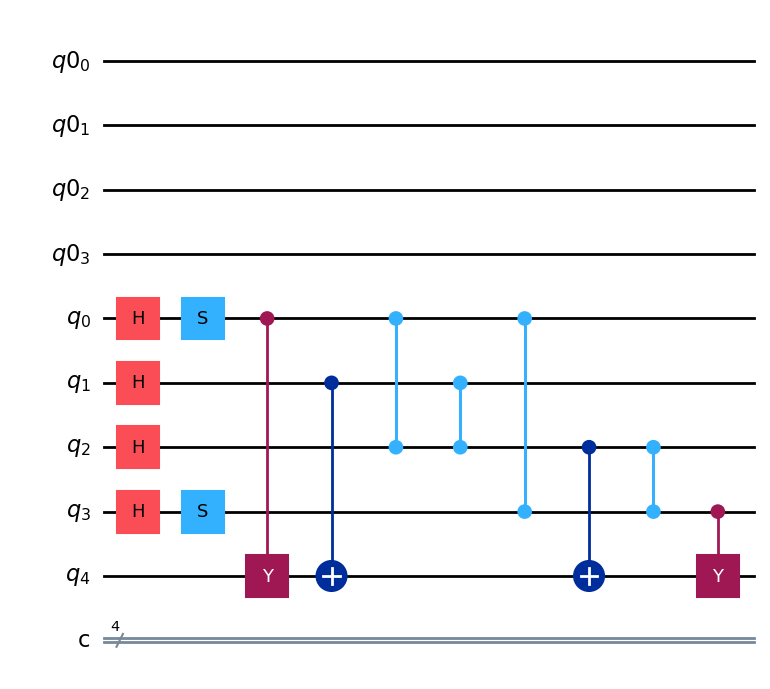

In [15]:
circuit.draw(output='mpl')

In [42]:
import random
# Error injection
def inject_single_qubit_error(circuit, qubits):
    error_type = random.choice(['x', 'y', 'z'])
    error_qubit = random.choice(qubits)
    if error_type == 'x':
        circuit.x(error_qubit)
    elif error_type == 'y':
        circuit.y(error_qubit)
    elif error_type == 'z':
        circuit.z(error_qubit)

    return(qubits.index(error_qubit), error_type)

print(inject_single_qubit_error(circuit, qreg_q))

(4, 'z')


In [54]:
from collections import Counter
import sys

result_dict = {}

total = 1000
for i in range(total):
    # Show progress percentage in the same line
    progress = int((i + 1) / total * 100)
    sys.stdout.write(f"\rSimulating: {progress}% ({i + 1}/{total})")
    sys.stdout.flush()

    circuit1 = circuit.copy()
    error = inject_single_qubit_error(circuit1, qreg_q)

    # Apply decoding gates
    circuit1.h(qreg_q0[0])
    circuit1.h(qreg_q0[1])
    circuit1.h(qreg_q0[2])
    circuit1.h(qreg_q0[3])
    circuit1.cx(qreg_q0[0], qreg_q[0])
    circuit1.cz(qreg_q0[0], qreg_q[1])
    circuit1.cz(qreg_q0[0], qreg_q[2])
    circuit1.cx(qreg_q0[0], qreg_q[3])
    circuit1.cx(qreg_q0[1], qreg_q[1])
    circuit1.cz(qreg_q0[1], qreg_q[2])
    circuit1.cz(qreg_q0[1], qreg_q[3])
    circuit1.cx(qreg_q0[1], qreg_q[4])
    circuit1.cx(qreg_q0[2], qreg_q[0])
    circuit1.cx(qreg_q0[2], qreg_q[2])
    circuit1.cz(qreg_q0[2], qreg_q[3])
    circuit1.cz(qreg_q0[2], qreg_q[4])
    circuit1.cz(qreg_q0[3], qreg_q[0])
    circuit1.cx(qreg_q0[3], qreg_q[1])
    circuit1.cx(qreg_q0[3], qreg_q[3])
    circuit1.cz(qreg_q0[3], qreg_q[4])
    circuit1.h(qreg_q0[0])
    circuit1.h(qreg_q0[1])
    circuit1.h(qreg_q0[2])
    circuit1.h(qreg_q0[3])
    circuit1.measure(qreg_q0[0], creg_c[0])
    circuit1.measure(qreg_q0[1], creg_c[1])
    circuit1.measure(qreg_q0[2], creg_c[2])
    circuit1.measure(qreg_q0[3], creg_c[3])

    qc_aer = transpile(circuit1, backend=backend_aer)
    job_aer = sampler_aer.run([(qc_aer, None, 1)])
    result_aer = job_aer.result()
    counts_qc1_aer = result_aer[0].data.c.get_counts()

    # Merge counts for each error type
    if error not in result_dict:
        result_dict[error] = Counter(counts_qc1_aer)
    else:
        result_dict[error].update(counts_qc1_aer)

# Move to the next line after final update
print("\nSimulation complete.")
print(result_dict)



Simulating: 100% (1000/1000)
Simulation complete.
{(2, 'y'): Counter({'0111': 62}), (0, 'x'): Counter({'1000': 62}), (3, 'y'): Counter({'1111': 68}), (4, 'x'): Counter({'1100': 59}), (0, 'z'): Counter({'0101': 61}), (1, 'x'): Counter({'0001': 68}), (2, 'z'): Counter({'0100': 70}), (4, 'y'): Counter({'1110': 93}), (4, 'z'): Counter({'0010': 62}), (3, 'z'): Counter({'1001': 83}), (0, 'y'): Counter({'1101': 64}), (3, 'x'): Counter({'0110': 66}), (1, 'z'): Counter({'1010': 55}), (1, 'y'): Counter({'1011': 64}), (2, 'x'): Counter({'0011': 63})}


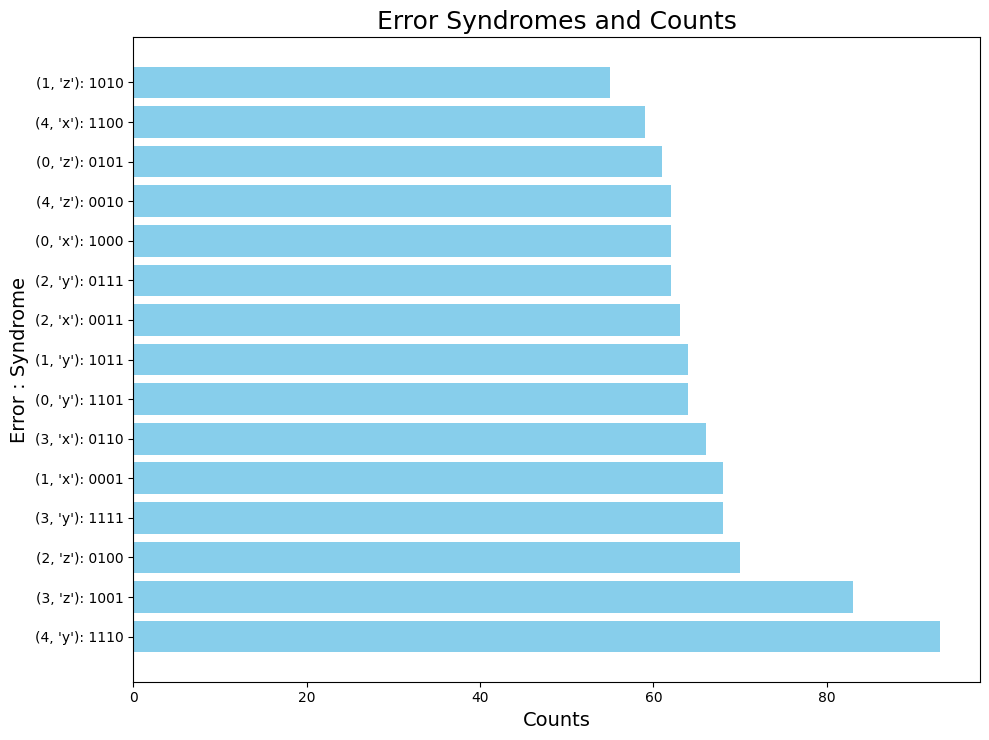

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten result_dict into a format like: {"error: syndrome": count}
flat_results = {}
for error, counter in result_dict.items():
    for syndrome, count in counter.items():
        label = f"{error}: {syndrome}"
        flat_results[label] = count

# Sort the results by count
sorted_results = dict(sorted(flat_results.items(), key=lambda item: item[1], reverse=True))

# Extract data for plotting
labels = list(sorted_results.keys())
counts = list(sorted_results.values())

# Plot
plt.figure(figsize=(10, max(4, len(labels) * 0.5)))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Error : Syndrome', fontsize=14)
plt.title('Error Syndromes and Counts', fontsize=18)

# Set x-axis ticks with unit step
max_count = max(counts)
plt.tight_layout()
plt.show()
